In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


In [23]:
import pandas as pd
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pavan@#2002",
    database="finance_analysis"
)

query = "SELECT * FROM budget_vs_actual"

df = pd.read_sql(query, conn)

df.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_148\975325527.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,transaction_date,department,category,region,budget_amount,actual_amount,payment_mode,transaction_id,variance
0,2023-05-11,Sales,Travel,North,126096.0,43048.0,Card,TXN100000,-83048.0
1,2023-05-12,Marketing,Salaries,East,19702.0,87896.0,Bank Transfer,TXN100001,68194.0
2,2023-05-13,IT,Training,Central,108523.0,103632.0,Card,TXN100002,-4891.0
3,2023-05-14,Marketing,Salaries,North,114711.0,105574.0,Cash,TXN100003,-9137.0
4,2023-05-15,Sales,Utilities,Central,121895.0,64314.0,UPI,TXN100004,-57581.0


---Data understanding

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_date  10010 non-null  object 
 1   department        10010 non-null  object 
 2   category          10010 non-null  object 
 3   region            10010 non-null  object 
 4   budget_amount     10010 non-null  float64
 5   actual_amount     10010 non-null  float64
 6   payment_mode      10010 non-null  object 
 7   transaction_id    10010 non-null  object 
 8   variance          10010 non-null  float64
dtypes: float64(3), object(6)
memory usage: 704.0+ KB


---Convert date column

In [25]:
df["transaction_date"] = pd.to_datetime(df["transaction_date"])
df.dtypes



transaction_date    datetime64[ns]
department                  object
category                    object
region                      object
budget_amount              float64
actual_amount              float64
payment_mode                object
transaction_id              object
variance                   float64
dtype: object

---Business KPI creation

In [26]:
df["overspend"] = df["actual_amount"] > df["budget_amount"]
df["variance_pct"] = (df["variance"] / df["budget_amount"]) * 100


---Core analyst questions

Total company budget vs actual


In [27]:
df[["budget_amount", "actual_amount"]].sum()


budget_amount    796111159.0
actual_amount    891202705.0
dtype: float64

---Department wise spend

In [28]:
dept_summary = df.groupby("department")[["budget_amount", "actual_amount", "variance"]].sum()
dept_summary


,budget_amount,actual_amount,variance
department,,,
,115763.0,114627.0,-1136.0
Finance,133015695.0,144175587.0,11159892.0
HR,137431733.0,155552618.0,18120885.0
IT,125771001.0,139663026.0,13892025.0
Marketing,132160077.0,152136504.0,19976427.0
Operations,132700254.0,147963512.0,15263258.0
Sales,134916636.0,151596831.0,16680195.0


--- Region wise overspend

In [29]:
region_summary = df.groupby("region")["variance"].sum().sort_values(ascending=False)
region_summary


region
East       21386507.0
Central    19506518.0
South      18959491.0
West       18501339.0
North      16554666.0
             183025.0
Name: variance, dtype: float64

--- Category wise loss

In [30]:
category_summary = df.groupby("category")["variance"].sum().sort_values()
category_summary


category
                    -25060.0
Training          12611453.0
Infrastructure    13010342.0
Travel            15062313.0
Marketing         16368030.0
Utilities         17445250.0
Salaries          20619218.0
Name: variance, dtype: float64

--- Budget vs Actual by Department Visualization

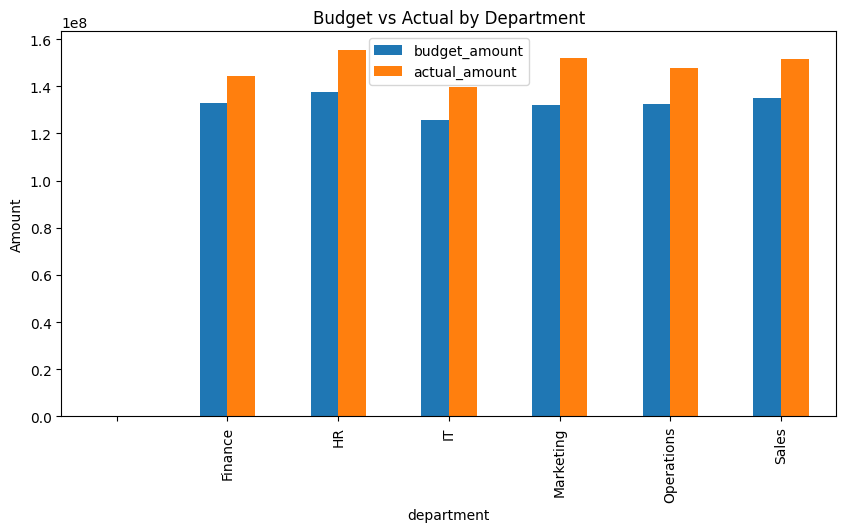

In [31]:
import matplotlib.pyplot as plt

dept_summary[["budget_amount", "actual_amount"]].plot(
    kind="bar",
    figsize=(10,5)
)

plt.title("Budget vs Actual by Department")
plt.ylabel("Amount")
plt.show()


Variance by Region

----You must write insights like:

Marketing department shows consistent overspending.

North region exceeds budget more than others.

Salaries category has highest budget deviation.

Travel expenses fluctuate heavily month to month.

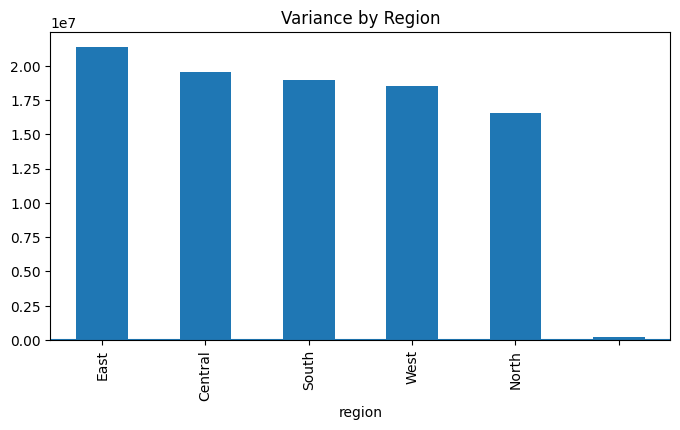

In [32]:
region_summary.plot(
    kind="bar",
    figsize=(8,4),
    title="Variance by Region"
)

plt.axhline(0)
plt.show()
